# Preprocessing and Data Cleaning

In [ ]:
!pip install qgrid
import numpy as np
import pandas as pd
import qgrid
import json
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from datetime import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Display all output and not just the last one

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Mount G Drive, so that it's possible to get the datasets from there
# (not necessary if run on Jupyter)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Extract 1.000 rows at a time to avoid memory error
# The result is a list (df) with every element composed by 1.000 rows of the dataset

with open('/content/drive/My Drive/Kickstarter Project/Kickstarter_Database_2020-09.json', encoding='utf-8') as f:
    df = []
    df_reader = pd.read_json(f, lines=True, chunksize=1000,orient='records')
    for chunk in df_reader:
        df.append(chunk)

In [ ]:
# Append to a single dataset (full data) all the elements

full_data=pd.DataFrame()
for i in df:
    full_data=full_data.append(i)   
full_data.head()

,table_id,robot_id,run_id,data
0,Kickstarter,Kickstarter,Kickstarter_2020-09-17T03_20_18_143Z,"{'id': 1568973024, 'photo': {'key': 'assets/02..."
1,Kickstarter,Kickstarter,Kickstarter_2020-09-17T03_20_18_143Z,"{'id': 1782378629, 'photo': {'key': 'assets/01..."
2,Kickstarter,Kickstarter,Kickstarter_2020-09-17T03_20_18_143Z,"{'id': 2076142479, 'photo': {'key': 'assets/02..."
3,Kickstarter,Kickstarter,Kickstarter_2020-09-17T03_20_18_143Z,"{'id': 1416797221, 'photo': {'key': 'assets/01..."
4,Kickstarter,Kickstarter,Kickstarter_2020-09-17T03_20_18_143Z,"{'id': 1708708142, 'photo': {'key': 'assets/02..."


In [ ]:
# Flatten all the data contained in the nested dictionaries of the 'data' column 

final_data=pd.json_normalize(full_data['data'])
final_data.head(5)
# final_data.columns

,id,name,blurb,goal,pledged,state,slug,disable_communication,country,country_displayable_name,currency,currency_symbol,currency_trailing_code,deadline,state_changed_at,created_at,launched_at,staff_pick,is_starrable,backers_count,static_usd_rate,usd_pledged,converted_pledged_amount,fx_rate,current_currency,usd_type,spotlight,source_url,photo.key,photo.full,photo.ed,photo.med,photo.little,photo.small,photo.thumb,photo.1024x576,photo.1536x864,creator.id,creator.name,creator.slug,creator.is_registered,creator.chosen_currency,creator.is_superbacker,creator.avatar.thumb,creator.avatar.small,creator.avatar.medium,creator.urls.web.user,creator.urls.api.user,location.id,location.name,location.slug,location.short_name,location.displayable_name,location.localized_name,location.country,location.state,location.type,location.is_root,location.expanded_country,location.urls.web.discover,location.urls.web.location,location.urls.api.nearby_projects,category.id,category.name,category.slug,category.position,category.parent_id,category.parent_name,category.color,category.urls.web.discover,profile.id,profile.project_id,profile.state,profile.state_changed_at,profile.name,profile.blurb,profile.background_color,profile.text_color,profile.link_background_color,profile.link_text_color,profile.link_text,profile.link_url,profile.show_feature_image,profile.background_image_opacity,profile.should_show_feature_image_section,profile.feature_image_attributes.image_urls.default,profile.feature_image_attributes.image_urls.baseball_card,urls.web.project,urls.web.rewards,profile.feature_image_attributes.id,profile.background_image_attributes.id,profile.background_image_attributes.image_urls.default,profile.background_image_attributes.image_urls.baseball_card,friends,is_starred,is_backing,permissions,urls.api.star,urls.api.message_creator,urls.web.message_creator
0,1568973024,Revisionist History 2,Support great art! Join us as we re-stage the ...,3000.0,4618.0,successful,revisionist-history-2,False,US,the United States,USD,$,True,1583025192,1583025192,1579292017,1580433192,True,False,61,1.0,4618.0,4618,1.0,USD,domestic,True,https://www.kickstarter.com/discover/categorie...,assets/027/785/229/436e3e732fb36a494fe8f702d73...,https://ksr-ugc.imgix.net/assets/027/785/229/4...,https://ksr-ugc.imgix.net/assets/027/785/229/4...,https://ksr-ugc.imgix.net/assets/027/785/229/4...,https://ksr-ugc.imgix.net/assets/027/785/229/4...,https://ksr-ugc.imgix.net/assets/027/785/229/4...,https://ksr-ugc.imgix.net/assets/027/785/229/4...,https://ksr-ugc.imgix.net/assets/027/785/229/4...,https://ksr-ugc.imgix.net/assets/027/785/229/4...,2092817311,Brooklyn Ballet,brooklynballet,None,None,None,https://ksr-ugc.imgix.net/assets/010/396/596/d...,https://ksr-ugc.imgix.net/assets/010/396/596/d...,https://ksr-ugc.imgix.net/assets/010/396/596/d...,https://www.kickstarter.com/profile/brooklynba...,https://api.kickstarter.com/v1/users/209281731...,12589335.0,Brooklyn,brooklyn-ny,"Brooklyn, NY","Brooklyn, NY",Brooklyn,US,NY,County,False,United States,https://www.kickstarter.com/discover/places/br...,https://www.kickstarter.com/locations/brooklyn-ny,https://api.kickstarter.com/v1/discover?signat...,254,Performances,dance/performances,1,6.0,Dance,10917369,http://www.kickstarter.com/discover/categories...,3914215,3914215,inactive,1579292017,None,None,None,None,None,None,None,None,False,0.8,True,https://ksr-ugc.imgix.net/assets/027/785/229/4...,https://ksr-ugc.imgix.net/assets/027/785/229/4...,https://www.kickstarter.com/projects/brooklynb...,https://www.kickstarter.com/projects/brooklynb...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1782378629,JinBucha: A Modern Kombucha tasting room in No...,JinBucha is a new kind of Brewery in North Par...,20000.0,3461.0,failed,jinbucha-a-modern-kombucha-tasting-room-in-nor...,False,US,the United States,USD,$,True,1450118057,1450118057,1446051515,1447526057,True,False,52,1.0,3461.0,3461,1.0,USD,domestic,False,https://www.kickstarter.com/discover/categorie...,asse

In [ ]:
# Format the columns containing dates, converting from Unix and removing the hours

date_cols=['deadline','state_changed_at', 'created_at', 'launched_at','profile.state_changed_at']
final_data[date_cols]= final_data[date_cols].apply(pd.to_datetime,unit='s')

# for col in date_cols:
#   final_data[col]=pd.to_datetime(final_data[col]).dt.date

final_data=final_data.rename(columns={"deadline":"deadline_at"})
final_data.head()

,id,name,blurb,goal,pledged,state,slug,disable_communication,country,country_displayable_name,currency,currency_symbol,currency_trailing_code,deadline_at,state_changed_at,created_at,launched_at,staff_pick,is_starrable,backers_count,static_usd_rate,usd_pledged,converted_pledged_amount,fx_rate,current_currency,usd_type,spotlight,source_url,photo.key,photo.full,photo.ed,photo.med,photo.little,photo.small,photo.thumb,photo.1024x576,photo.1536x864,creator.id,creator.name,creator.slug,creator.is_registered,creator.chosen_currency,creator.is_superbacker,creator.avatar.thumb,creator.avatar.small,creator.avatar.medium,creator.urls.web.user,creator.urls.api.user,location.id,location.name,location.slug,location.short_name,location.displayable_name,location.localized_name,location.country,location.state,location.type,location.is_root,location.expanded_country,location.urls.web.discover,location.urls.web.location,location.urls.api.nearby_projects,category.id,category.name,category.slug,category.position,category.parent_id,category.parent_name,category.color,category.urls.web.discover,profile.id,profile.project_id,profile.state,profile.state_changed_at,profile.name,profile.blurb,profile.background_color,profile.text_color,profile.link_background_color,profile.link_text_color,profile.link_text,profile.link_url,profile.show_feature_image,profile.background_image_opacity,profile.should_show_feature_image_section,profile.feature_image_attributes.image_urls.default,profile.feature_image_attributes.image_urls.baseball_card,urls.web.project,urls.web.rewards,profile.feature_image_attributes.id,profile.background_image_attributes.id,profile.background_image_attributes.image_urls.default,profile.background_image_attributes.image_urls.baseball_card,friends,is_starred,is_backing,permissions,urls.api.star,urls.api.message_creator,urls.web.message_creator
0,1568973024,Revisionist History 2,Support great art! Join us as we re-stage the ...,3000.0,4618.0,successful,revisionist-history-2,False,US,the United States,USD,$,True,2020-03-01 01:13:12,2020-03-01 01:13:12,2020-01-17 20:13:37,2020-01-31 01:13:12,True,False,61,1.0,4618.0,4618,1.0,USD,domestic,True,https://www.kickstarter.com/discover/categorie...,assets/027/785/229/436e3e732fb36a494fe8f702d73...,https://ksr-ugc.imgix.net/assets/027/785/229/4...,https://ksr-ugc.imgix.net/assets/027/785/229/4...,https://ksr-ugc.imgix.net/assets/027/785/229/4...,https://ksr-ugc.imgix.net/assets/027/785/229/4...,https://ksr-ugc.imgix.net/assets/027/785/229/4...,https://ksr-ugc.imgix.net/assets/027/785/229/4...,https://ksr-ugc.imgix.net/assets/027/785/229/4...,https://ksr-ugc.imgix.net/assets/027/785/229/4...,2092817311,Brooklyn Ballet,brooklynballet,None,None,None,https://ksr-ugc.imgix.net/assets/010/396/596/d...,https://ksr-ugc.imgix.net/assets/010/396/596/d...,https://ksr-ugc.imgix.net/assets/010/396/596/d...,https://www.kickstarter.com/profile/brooklynba...,https://api.kickstarter.com/v1/users/209281731...,12589335.0,Brooklyn,brooklyn-ny,"Brooklyn, NY","Brooklyn, NY",Brooklyn,US,NY,County,False,United States,https://www.kickstarter.com/discover/places/br...,https://www.kickstarter.com/locations/brooklyn-ny,https://api.kickstarter.com/v1/discover?signat...,254,Performances,dance/performances,1,6.0,Dance,10917369,http://www.kickstarter.com/discover/categories...,3914215,3914215,inactive,2020-01-17 20:13:37,None,None,None,None,None,None,None,None,False,0.8,True,https://ksr-ugc.imgix.net/assets/027/785/229/4...,https://ksr-ugc.imgix.net/assets/027/785/229/4...,https://www.kickstarter.com/projects/brooklynb...,https://www.kickstarter.com/projects/brooklynb...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1782378629,JinBucha: A Modern Kombucha tasting room in No...,JinBucha is a new kind of Brewery in North Par...,20000.0,3461.0,failed,jinbucha-a-modern-kombucha-tasting-room-in-nor...,False,US,the United States,USD,$,True,2015-12-14 18:34:17,2015-12-14 18:34:17,2015-10-28 16:58:35,2015-11-14 18:34:17,True,False,52,1.0,3461.

In [ ]:
final_data.dtypes

id                                                                       int64
name                                                                    object
blurb                                                                   object
goal                                                                   float64
pledged                                                                float64
state                                                                   object
slug                                                                    object
disable_communication                                                     bool
country                                                                 object
country_displayable_name                                                object
currency                                                                object
currency_symbol                                                         object
currency_trailing_code                              

In [ ]:
# Order dataset by 'created_at' (data since 2009)
final_data.sort_values(by='created_at',ascending=False)

,id,name,blurb,goal,pledged,state,slug,disable_communication,country,country_displayable_name,currency,currency_symbol,currency_trailing_code,deadline_at,state_changed_at,created_at,launched_at,staff_pick,is_starrable,backers_count,static_usd_rate,usd_pledged,converted_pledged_amount,fx_rate,current_currency,usd_type,spotlight,source_url,photo.key,photo.full,photo.ed,photo.med,photo.little,photo.small,photo.thumb,photo.1024x576,photo.1536x864,creator.id,creator.name,creator.slug,creator.is_registered,creator.chosen_currency,creator.is_superbacker,creator.avatar.thumb,creator.avatar.small,creator.avatar.medium,creator.urls.web.user,creator.urls.api.user,location.id,location.name,location.slug,location.short_name,location.displayable_name,location.localized_name,location.country,location.state,location.type,location.is_root,location.expanded_country,location.urls.web.discover,location.urls.web.location,location.urls.api.nearby_projects,category.id,category.name,category.slug,category.position,category.parent_id,category.parent_name,category.color,category.urls.web.discover,profile.id,profile.project_id,profile.state,profile.state_changed_at,profile.name,profile.blurb,profile.background_color,profile.text_color,profile.link_background_color,profile.link_text_color,profile.link_text,profile.link_url,profile.show_feature_image,profile.background_image_opacity,profile.should_show_feature_image_section,profile.feature_image_attributes.image_urls.default,profile.feature_image_attributes.image_urls.baseball_card,urls.web.project,urls.web.rewards,profile.feature_image_attributes.id,profile.background_image_attributes.id,profile.background_image_attributes.image_urls.default,profile.background_image_attributes.image_urls.baseball_card,friends,is_starred,is_backing,permissions,urls.api.star,urls.api.message_creator,urls.web.message_creator
142659,2048843967,City Pearl Eatery,A upscale casual restaurant for regulars to fe...,30000.0,201.29,live,city-pearl-eatery,False,CA,Canada,CAD,$,True,2020-10-17 01:10:54,2020-09-17 01:10:55,2020-09-16 23:39:32,2020-09-17 01:10:54,False,True,2,0.759054,152.7900179051,152,0.755744,USD,domestic,False,https://www.kickstarter.com/discover/categorie...,assets/030/632/428/91ccd7d3f97c012bc75e09b785d...,https://ksr-ugc.imgix.net/assets/030/632/428/9...,https://ksr-ugc.imgix.net/assets/030/632/428/9...,https://ksr-ugc.imgix.net/assets/030/632/428/9...,https://ksr-ugc.imgix.net/assets/030/632/428/9...,https://ksr-ugc.imgix.net/assets/030/632/428/9...,https://ksr-ugc.imgix.net/assets/030/632/428/9...,https://ksr-ugc.imgix.net/assets/030/632/428/9...,https://ksr-ugc.imgix.net/assets/030/632/428/9...,81446348,Cora Tudor,cst,None,None,None,https://ksr-ugc.imgix.net/assets/030/632/839/e...,https://ksr-ugc.imgix.net/assets/030/632/839/e...,https://ksr-ugc.imgix.net/assets/030/632/839/e...,https://www.kickstarter.com/profile/cst,https://api.kickstarter.com/v1/users/81446348?...,4177.0,Halifax,halifax-ca,"Halifax, Canada","Halifax, Canada",Halifax,CA,NS,Town,False,Canada,https://www.kickstarter.com/discover/places/ha...,https://www.kickstarter.com/locations/halifax-ca,https://api.kickstarter.com/v1/discover?signat...,312,Restaurants,food/restaurants,9,10.0,Food,16725570,http://www.kickstarter.com/discover/categories...,4072635,4072635,inactive,2020-09-16 23:39:32,None,None,None,None,None,None,None,None,False,0.80,True,https://ksr-ugc.imgix.net/assets/030/632/428/9...,https://ksr-ugc.imgix.net/assets/030/632/428/9...,https://www.kickstarter.com/projects/cst/city-...,https://www.kickstarter.com/projects/cst/city-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124021,2048843967,City Pearl Eatery,A upscale casual restaurant for regulars to fe...,30000.0,201.29,live,city-pearl-eatery,False,CA,Canada,CAD,$,True,2020-10-17 01:10:54,2020-09-17 01:10:55,2020-09-16 23:39:32,2020-09-17 01:10:54,False,True,2,0.759054,152.7900179051,152,0.755744,USD,domestic,False,https://www.kickstarter.com/discover/categorie...,assets/030/632/428/

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219688 entries, 0 to 219687
Data columns (total 100 columns):
 #   Column                                                        Non-Null Count   Dtype         
---  ------                                                        --------------   -----         
 0   id                                                            219688 non-null  int64         
 1   name                                                          219688 non-null  object        
 2   blurb                                                         219688 non-null  object        
 3   goal                                                          219688 non-null  float64       
 4   pledged                                                       219688 non-null  float64       
 5   state                                                         219688 non-null  object        
 6   slug                                                          219688 non-null  object      

In [ ]:
dataset = final_data.copy()

# Remove open campaigns
dataset = dataset[dataset['state'] !='live']

# Remove columns not interesting for our analysis
removed_columns = ['disable_communication','currency_trailing_code','state_changed_at','is_starrable','usd_type','spotlight','photo.key',
                   'photo.full','photo.ed','photo.med','photo.little','photo.small','photo.thumb','photo.1024x576','photo.1536x864',
                   'creator.name','creator.slug','creator.is_registered','creator.chosen_currency','creator.is_superbacker',
                   'creator.avatar.thumb','creator.avatar.small','creator.avatar.medium','creator.urls.web.user','creator.urls.api.user',
                   'location.id','location.name','location.slug','location.short_name','location.localized_name','location.type',
                   'location.is_root','location.urls.web.discover','location.urls.web.location','location.urls.api.nearby_projects',
                   'category.slug','category.position','category.parent_id','category.color','category.urls.web.discover',
                   'profile.id','profile.project_id','profile.state','profile.state_changed_at','profile.name','profile.blurb',
                   'profile.background_color','profile.text_color','profile.link_background_color','profile.link_text_color',
                   'profile.link_text','profile.link_url','profile.show_feature_image','profile.background_image_opacity',
                   'profile.should_show_feature_image_section','profile.feature_image_attributes.image_urls.default',
                   'profile.feature_image_attributes.image_urls.baseball_card','urls.web.project','urls.web.rewards','profile.feature_image_attributes.id',
                   'profile.background_image_attributes.id', 'profile.background_image_attributes.image_urls.default',
                   'profile.background_image_attributes.image_urls.baseball_card','friends','is_starred','is_backing','permissions',
                   'urls.api.star','urls.api.message_creator','urls.web.message_creator','pledged','slug','currency_symbol',
                   'fx_rate','source_url','category.id','country_displayable_name','location.expanded_country']

dataset = dataset.drop(axis=1,labels=removed_columns)
dataset.head(1)
dataset.columns

,id,name,blurb,goal,state,country,currency,deadline_at,created_at,launched_at,staff_pick,backers_count,static_usd_rate,usd_pledged,converted_pledged_amount,current_currency,creator.id,location.displayable_name,location.country,location.state,category.name,category.parent_name
0,1568973024,Revisionist History 2,Support great art! Join us as we re-stage the ...,3000.0,successful,US,USD,2020-03-01 01:13:12,2020-01-17 20:13:37,2020-01-31 01:13:12,True,61,1.0,4618.0,4618,USD,2092817311,"Brooklyn, NY",US,NY,Performances,Dance


Index(['id', 'name', 'blurb', 'goal', 'state', 'country', 'currency',
       'deadline_at', 'created_at', 'launched_at', 'staff_pick',
       'backers_count', 'static_usd_rate', 'usd_pledged',
       'converted_pledged_amount', 'current_currency', 'creator.id',
       'location.displayable_name', 'location.country', 'location.state',
       'category.name', 'category.parent_name'],
      dtype='object')

In [ ]:
# Further cleaning
data = dataset.copy()

# Currency conversion
data['goal_converted'] = data['goal']*data['static_usd_rate']

# Keep just projects that are not canceled 
data = data[data['state']!='canceled']

# Recode dummy 'state' (1 = successful, 0 otherwise)
data['state'] = np.where(data['state']=='successful', 1, 0)

# Recode dummy 'staff_pick' (1 = True, 0 otherwise)
data['staff_pick'] = np.where(data['staff_pick']==True, 1, 0)

# Rename 'state' as outcome to increse readability
data = data.rename(columns={'state': 'outcome'})

# Drop projects with location different from US
data = data[data['location.country']=='US']

# Fix the variable identifying parent_category
data['parent_category_name'] = data['category.parent_name']
data['parent_category_name'].fillna('change', inplace = True)
data['parent_category_name'] = np.where(data['parent_category_name']== 'change', data['category.name'], data['parent_category_name'])

# Drop useless columns
to_be_dropped = ['current_currency', 'currency', 'created_at', 'usd_pledged', 'category.parent_name','goal','static_usd_rate']
data = data.drop(to_be_dropped,axis=1)

In [ ]:
# Create "year" variable
data['year'] = data['deadline_at'].dt.year

# Drop projects in years 2009 and 2020, that are incomplete
data = data.drop(data[(data['year']==2009)|(data['year']==2020)].index)
data.drop_duplicates(subset='id', inplace=True)

In [ ]:
# Export of the dataset
data.to_json('/content/drive/My Drive/Kickstarter Project/processed_dataset_v1')

In [ ]:
#intermediate load
data = pd.read_json('/content/drive/My Drive/Kickstarter Project/processed_dataset_v1')
data.head(3)

,id,name,blurb,outcome,country,deadline_at,launched_at,staff_pick,backers_count,converted_pledged_amount,creator.id,location.displayable_name,location.country,location.state,category.name,goal_converted,parent_category_name,year
1,1782378629,JinBucha: A Modern Kombucha tasting room in No...,JinBucha is a new kind of Brewery in North Par...,0,US,2015-12-14 18:34:17,2015-11-14 18:34:17,1,52,3461,1468694331,"San Diego, CA",US,CA,Drinks,20000.0,Food,2015
2,2076142479,Tea Room Cafe - Daily & Herb Tea,"""Taste The Scent of Tea"" Rose and Blanc Tea Ro...",0,US,2018-03-05 07:01:00,2018-02-09 20:41:27,0,0,0,2026565095,"Los Angeles, CA",US,CA,Drinks,15000.0,Food,2018
3,1416797221,HELP TWO BROTHERS OPEN A FOOD TRUCK!,Bringing Philly cheesesteaks (and other delici...,0,US,2016-04-05 19:50:44,2016-02-05 20:50:44,0,2,25,1629155736,"Denver, CO",US,CO,Food Trucks,2000.0,Food,2016


In [ ]:
# Create the variable 'duration'
data['duration']=data['deadline_at']-data['launched_at']
data['duration']=(data['duration'] / np.timedelta64(1, 'D')).astype(int)
data['duration'].describe()

count    111955.000000
mean         32.537609
std          11.903861
min           1.000000
25%          29.000000
50%          30.000000
75%          34.000000
max          97.000000
Name: duration, dtype: float64

In [ ]:
# Create dummy 'weekend' (= 1 if launched during weekend)

data['weekday']=data['launched_at'].dt.dayofweek
days = { 0: "Monday",
       1: 'Tuesday',
       2: 'Wednesday',
       3: 'Thursday',
       4: 'Friday',
       5: 'Saturday',
       6: 'Sunday'}
data.replace({'weekday': days}, inplace=True)
data['weekday']= data['weekday'].astype('string')
data['weekend'] = np.where((data['weekday']=='Saturday')|(data['weekday']=='Sunday'),1,0)
data.head(3)

,id,name,blurb,outcome,country,deadline_at,launched_at,staff_pick,backers_count,converted_pledged_amount,creator.id,location.displayable_name,location.country,location.state,category.name,goal_converted,parent_category_name,year,duration,weekday,weekend
1,1782378629,JinBucha: A Modern Kombucha tasting room in No...,JinBucha is a new kind of Brewery in North Par...,0,US,2015-12-14 18:34:17,2015-11-14 18:34:17,1,52,3461,1468694331,"San Diego, CA",US,CA,Drinks,20000.0,Food,2015,30,Saturday,1
2,2076142479,Tea Room Cafe - Daily & Herb Tea,"""Taste The Scent of Tea"" Rose and Blanc Tea Ro...",0,US,2018-03-05 07:01:00,2018-02-09 20:41:27,0,0,0,2026565095,"Los Angeles, CA",US,CA,Drinks,15000.0,Food,2018,23,Friday,0
3,1416797221,HELP TWO BROTHERS OPEN A FOOD TRUCK!,Bringing Philly cheesesteaks (and other delici...,0,US,2016-04-05 19:50:44,2016-02-05 20:50:44,0,2,25,1629155736,"Denver, CO",US,CO,Food Trucks,2000.0,Food,2016,59,Friday,0


In [ ]:
data = data.sort_values(by=['creator.id','launched_at'], ascending=[True,True])

# Create column 'previous projects'
data['event'] = data.groupby('creator.id').cumcount()+1
data['prev_project'] = np.where(data['creator.id']==data['creator.id'].shift(),1, 0)
data['prev_project'] = data.groupby('creator.id')['prev_project'].transform('cumsum')

# Create column 'previous success'
data['prev_success'] = np.where((data['creator.id']==data['creator.id'].shift()) &(data['outcome'].shift()==1), 1, 0)
data['prev_success'] = data.groupby('creator.id')['prev_success'].transform('cumsum')

# Create column 'previous fail'
data['prev_fail'] = np.where((data['creator.id']==data['creator.id'].shift()) &(data['outcome'].shift()==0), 1, 0)
data['prev_fail'] = data.groupby('creator.id')['prev_fail'].transform('cumsum')

data.head()

,id,name,blurb,outcome,country,deadline_at,launched_at,staff_pick,backers_count,converted_pledged_amount,creator.id,location.displayable_name,location.country,location.state,category.name,goal_converted,parent_category_name,year,duration,weekday,weekend,event,prev_project,prev_success,prev_fail
178590,134175247,Center for Lost Arts – a document,A month-long pop-up workshop & design studio i...,1,US,2015-07-01 04:59:00,2015-06-16 20:02:59,1,190,11486,3,"Chicago, IL",US,IL,Public Art,5000.0,Art,2015,14,Tuesday,0,1,0,0,0
86294,1577455391,This is also not a Kickstarter shirt,A T-shirt with the final stats of the project ...,1,US,2014-05-28 22:17:37,2014-05-14 22:17:37,1,604,16167,8,"New York, NY",US,NY,Apparel,500.0,Fashion,2014,14,Wednesday,0,1,0,0,0
12530,171893227,Invisible Courts,A series of alternate NBA realities inspired b...,1,US,2017-01-12 02:00:00,2017-01-04 18:28:57,1,104,207,8,"New York, NY",US,NY,Zines,50.0,Publishing,2017,7,Wednesday,0,2,1,1,0
197280,599992665,The Return of Upcoming.org,"Launched in 2003 and ""sunsetted"" last year, Up...",1,US,2014-05-30 22:00:00,2014-05-07 16:58:23,1,1787,104983,9,"Portland, OR",US,OR,Web,30000.0,Technology,2014,23,Wednesday,0,1,0,0,0
28910,1909672238,"Brassft Punk does ""Get Lucky""",A New Orleans brass band version of Daft Punk'...,1,US,2013-05-14 23:00:00,2013-04-29 16:18:50,1,493,3194,11,"New Orleans, LA",US,LA,Electronic Music,2000.0,Music,2013,15,Monday,0,1,0,0,0


In [ ]:
data.to_json('/content/drive/My Drive/Kickstarter Project/processed_dataset_v2')

# Logit Regression

In [ ]:
# Intermediate load
data = pd.read_json('/content/drive/My Drive/Kickstarter Project/processed_dataset_v2')

In [ ]:
# Add a column with the number of projects per creator (in their entire career)

data = data.sort_values (by='creator.id', ascending=True)
dfc = data.groupby (by='creator.id')[['id']].count()
dfc = dfc.reset_index()
dfc = dfc.rename(columns = {'id': 'n_projects'})
data = data.merge(dfc, on='creator.id', how='inner')
data.head()

,id,name,blurb,outcome,country,deadline_at,launched_at,staff_pick,backers_count,converted_pledged_amount,creator.id,location.displayable_name,location.country,location.state,category.name,goal_converted,parent_category_name,year,duration,weekday,weekend,event,prev_project,prev_success,prev_fail,n_projects
0,134175247,Center for Lost Arts – a document,A month-long pop-up workshop & design studio i...,1,US,2015-07-01 04:59:00,2015-06-16 20:02:59,1,190,11486,3,"Chicago, IL",US,IL,Public Art,5000.0,Art,2015,14,Tuesday,0,1,0,0,0,1
1,1577455391,This is also not a Kickstarter shirt,A T-shirt with the final stats of the project ...,1,US,2014-05-28 22:17:37,2014-05-14 22:17:37,1,604,16167,8,"New York, NY",US,NY,Apparel,500.0,Fashion,2014,14,Wednesday,0,1,0,0,0,2
2,171893227,Invisible Courts,A series of alternate NBA realities inspired b...,1,US,2017-01-12 02:00:00,2017-01-04 18:28:57,1,104,207,8,"New York, NY",US,NY,Zines,50.0,Publishing,2017,7,Wednesday,0,2,1,1,0,2
3,599992665,The Return of Upcoming.org,"Launched in 2003 and ""sunsetted"" last year, Up...",1,US,2014-05-30 22:00:00,2014-05-07 16:58:23,1,1787,104983,9,"Portland, OR",US,OR,Web,30000.0,Technology,2014,23,Wednesday,0,1,0,0,0,1
4,1909672238,"Brassft Punk does ""Get Lucky""",A New Orleans brass band version of Daft Punk'...,1,US,2013-05-14 23:00:00,2013-04-29 16:18:50,1,493,3194,11,"New Orleans, LA",US,LA,Electronic Music,2000.0,Music,2013,15,Monday,0,1,0,0,0,1


In [ ]:
# Keep just the creators with more than 1 project in their life
data = data[data['n_projects'] > 1]
data.head()

,id,name,blurb,outcome,country,deadline_at,launched_at,staff_pick,backers_count,converted_pledged_amount,creator.id,location.displayable_name,location.country,location.state,category.name,goal_converted,parent_category_name,year,duration,weekday,weekend,event,prev_project,prev_success,prev_fail,n_projects
1,1577455391,This is also not a Kickstarter shirt,A T-shirt with the final stats of the project ...,1,US,2014-05-28 22:17:37,2014-05-14 22:17:37,1,604,16167,8,"New York, NY",US,NY,Apparel,500.0,Fashion,2014,14,Wednesday,0,1,0,0,0,2
2,171893227,Invisible Courts,A series of alternate NBA realities inspired b...,1,US,2017-01-12 02:00:00,2017-01-04 18:28:57,1,104,207,8,"New York, NY",US,NY,Zines,50.0,Publishing,2017,7,Wednesday,0,2,1,1,0,2
10,389695249,The Red House Restaurant HomeMade Comfort Food,"My Ultimate Dream, Passion❤❤❤ The Red House Re...",0,US,2018-07-06 16:18:02,2018-06-06 16:18:02,0,3,12,250503,"Freeville, NY",US,NY,Restaurants,200000.0,Food,2018,30,Wednesday,0,3,2,0,2,3
11,458128423,The Red House HomeMade To Go,"My Ultimate Dream, Passion❤❤❤\r\nThe Red House...",0,US,2018-03-13 02:54:43,2018-02-11 03:54:43,0,1,5,250503,"Aurora, NY",US,NY,Restaurants,200000.0,Food,2018,29,Sunday,1,2,1,0,1,3
12,168050712,"The Red House by Nancy Jackson ""Pay it Forward...","The Red House has a unique ""Pay it Forward"" co...",0,US,2016-03-10 20:27:25,2016-02-09 20:27:25,0,3,3,250503,"Dryden, NY",US,NY,Restaurants,50000.0,Food,2016,30,Tuesday,0,1,0,0,0,3


In [ ]:
# Change the units of analysis
data['blurb_len']=data['blurb'].str.len()
data['th_goal'] = data['goal_converted']/1000
data.head()

,id,name,blurb,outcome,country,deadline_at,launched_at,staff_pick,backers_count,converted_pledged_amount,creator.id,location.displayable_name,location.country,location.state,category.name,goal_converted,parent_category_name,year,duration,weekday,weekend,event,prev_project,prev_success,prev_fail,n_projects,blurb_len,th_goal
1,1577455391,This is also not a Kickstarter shirt,A T-shirt with the final stats of the project ...,1,US,2014-05-28 22:17:37,2014-05-14 22:17:37,1,604,16167,8,"New York, NY",US,NY,Apparel,500.0,Fashion,2014,14,Wednesday,0,1,0,0,0,2,68,0.50
2,171893227,Invisible Courts,A series of alternate NBA realities inspired b...,1,US,2017-01-12 02:00:00,2017-01-04 18:28:57,1,104,207,8,"New York, NY",US,NY,Zines,50.0,Publishing,2017,7,Wednesday,0,2,1,1,0,2,83,0.05
10,389695249,The Red House Restaurant HomeMade Comfort Food,"My Ultimate Dream, Passion❤❤❤ The Red House Re...",0,US,2018-07-06 16:18:02,2018-06-06 16:18:02,0,3,12,250503,"Freeville, NY",US,NY,Restaurants,200000.0,Food,2018,30,Wednesday,0,3,2,0,2,3,123,200.00
11,458128423,The Red House HomeMade To Go,"My Ultimate Dream, Passion❤❤❤\r\nThe Red House...",0,US,2018-03-13 02:54:43,2018-02-11 03:54:43,0,1,5,250503,"Aurora, NY",US,NY,Restaurants,200000.0,Food,2018,29,Sunday,1,2,1,0,1,3,135,200.00
12,168050712,"The Red House by Nancy Jackson ""Pay it Forward...","The Red House has a unique ""Pay it Forward"" co...",0,US,2016-03-10 20:27:25,2016-02-09 20:27:25,0,3,3,250503,"Dryden, NY",US,NY,Restaurants,50000.0,Food,2016,30,Tuesday,0,1,0,0,0,3,135,50.00


In [ ]:
# Let's have a look at the correlation table

data_final = data[['outcome','th_goal','duration','blurb_len','weekend','staff_pick', 'prev_fail', 'prev_success']]
corr_tab = data_final.corr()
corr_tab

,outcome,th_goal,duration,blurb_len,weekend,staff_pick,prev_fail,prev_success
outcome,1.000000,-0.037327,-0.158293,0.018784,-0.029079,0.210600,-0.312041,0.189046
th_goal,-0.037327,1.000000,0.024210,-0.012125,0.004008,-0.004392,0.006704,-0.009942
duration,-0.158293,0.024210,1.000000,0.060623,0.013977,0.014966,0.029009,-0.167215
blurb_len,0.018784,-0.012125,0.060623,1.000000,-0.007828,0.075471,-0.058133,-0.057795
weekend,-0.029079,0.004008,0.013977,-0.007828,1.000000,-0.045835,0.018407,-0.000091
staff_pick,0.210600,-0.004392,0.014966,0.075471,-0.045835,1.000000,-0.124236,-0.008675
prev_fail,-0.312041,0.006704,0.029009,-0.058133,0.018407,-0.124236,1.000000,-0.010199
prev_success,0.189046,-0.009942,-0.167215,-0.057795,-0.000091,-0.008675,-0.010199,1.000000


In [ ]:
# Regress the final model

indep_vars = ['th_goal','duration','blurb_len','weekend','staff_pick', 'prev_fail', 'prev_success']

# 'blurb_len' = Number of characters

x = sm.add_constant(data[indep_vars])
y = data['outcome']
model = sm.Logit(y,x,missing='drop')
results = model.fit()
print(results.summary())

# print(results.get_margeff(at='mean', dummy=True, count=True).summary())

odd_ratios = np.exp(results.params)
print(odd_ratios)

print(results.get_margeff(at='mean', dummy=True, count=True).summary())
goal = np.exp(odd_ratios[1])
print(goal)

/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Optimization terminated successfully.
         Current function value: 0.414183
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                outcome   No. Observations:                23075
Model:                          Logit   Df Residuals:                    23067
Method:                           MLE   Df Model:                            7
Date:                Thu, 03 Dec 2020   Pseudo R-squ.:                  0.2558
Time:                        19:33:04   Log-Likelihood:                -9557.3
converged:                       True   LL-Null:                       -12842.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.2812      0.086     14.868      0.000       1.112       1.450
th_goal         -0.019

## Marginal Effects

In [ ]:
max_succ = data[['prev_success']].max()
# projects = list(range(0, int(max_succ) +1 , 1))
projects = list(range(0, 11, 1))

In [ ]:
from collections import OrderedDict 
avg_list=[data[var].mean() for var in data[indep_vars]]
avg_dict=OrderedDict(zip(indep_vars,avg_list))
result = avg_dict.pop('prev_success', None)
result = avg_dict.pop('prev_fail', None)
avg_dict

OrderedDict([('th_goal', 24.130485565008435),
             ('duration', 30.267518959913325),
             ('blurb_len', 109.36654387865656),
             ('weekend', 0.13482123510292524),
             ('staff_pick', 0.18561213434452872)])

In [ ]:
# To get the predicted probability plot for previous_successes
probs_succ = []
for k in projects:
    df = data[indep_vars].copy()
    df.insert(loc=0, column='const', value=1)
    df = df.iloc[0].to_frame().reset_index()
    df.columns = ['vars', 'value']
    df['value'] = np.where(df['vars']!='const', 0, df['value'])
    df['value'] = np.where(df['vars']=='prev_success', k, df['value'])
    df['value'] = np.where(df['vars']=='prev_fail', 0, df['value'])
    for var,avg in avg_dict.items():
      df['value'] = np.where(df['vars'] == var, avg, df['value'])
    vals = df[['value']].values.flatten()
    # generate predicted probability
    prob = results.predict(vals)
    # add predicted prob to list
    probs_succ.append(prob[0])

In [ ]:
# To get the predicted probability plot for previous_failures
probs_fail = []
for k in projects:
    df = data[indep_vars].copy()
    df.insert(loc=0, column='const', value=1)
    df = df.iloc[0].to_frame().reset_index()
    df.columns = ['vars', 'value']
    df['value'] = np.where(df['vars']!='const', 0, df['value'])
    df['value'] = np.where(df['vars']=='prev_fail', k, df['value'])
    df['value'] = np.where(df['vars']=='prev_success', 0, df['value'])
    for var,avg in avg_dict.items():
      df['value'] = np.where(df['vars'] == var, avg, df['value'])
    vals = df[['value']].values.flatten()
    # generate predicted probability
    prob = results.predict(vals)
    # add predicted prob to list
    probs_fail.append(prob[0])

Text(0.5, 0, 'Number of previous successes')

Text(0, 0.5, 'Prob. of success')

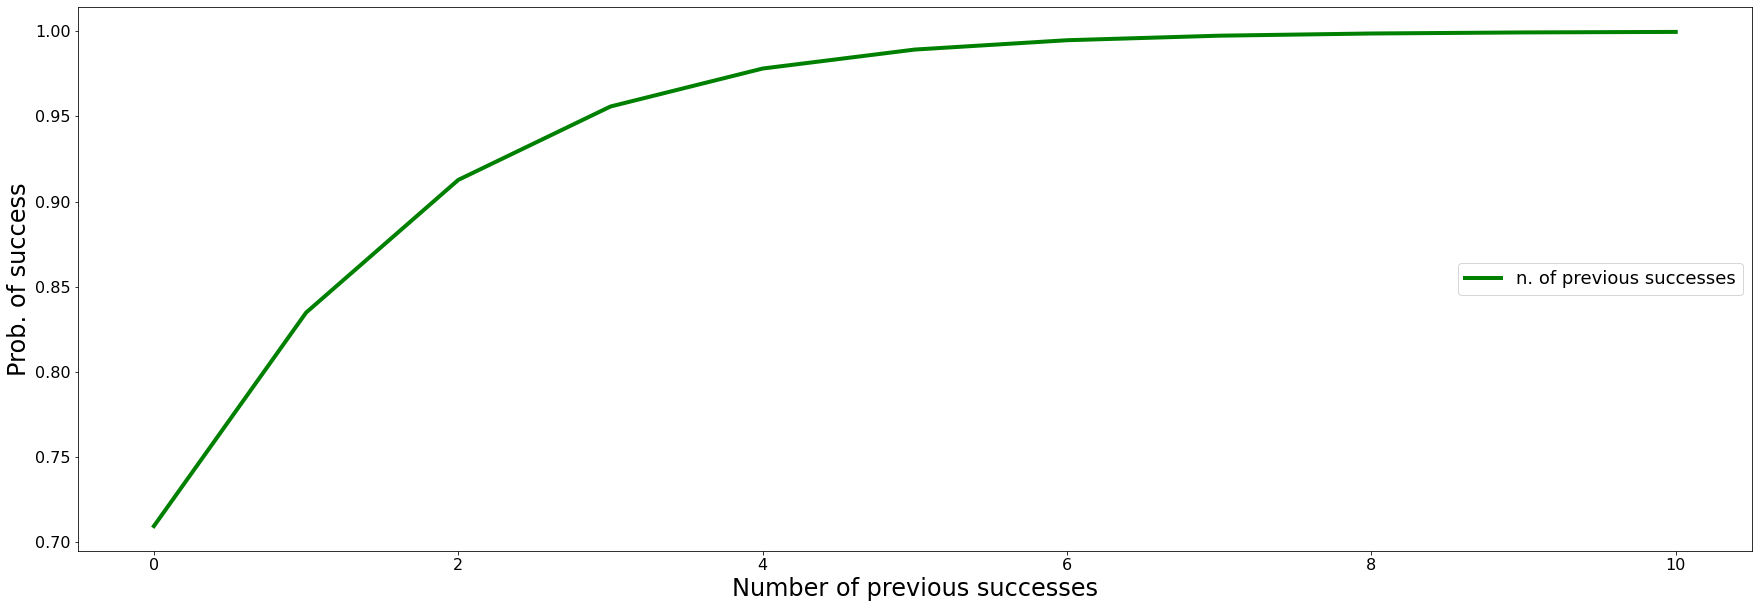

In [ ]:
# Predicted probability plot for previous_successes

_ = plt.figure(figsize=(30,10))
plt.plot(projects, probs_succ, linewidth=4, label='n. of previous successes',color="green")
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

plt.xlabel("Number of previous successes", fontsize=24) 
plt.ylabel("Prob. of success", fontsize=24, rotation=90)

plt.legend(loc = 'center right', prop={'size': 18})
plt.show()

Text(0.5, 0, 'Number of previous failures')

Text(0, 0.5, 'Prob. of success')

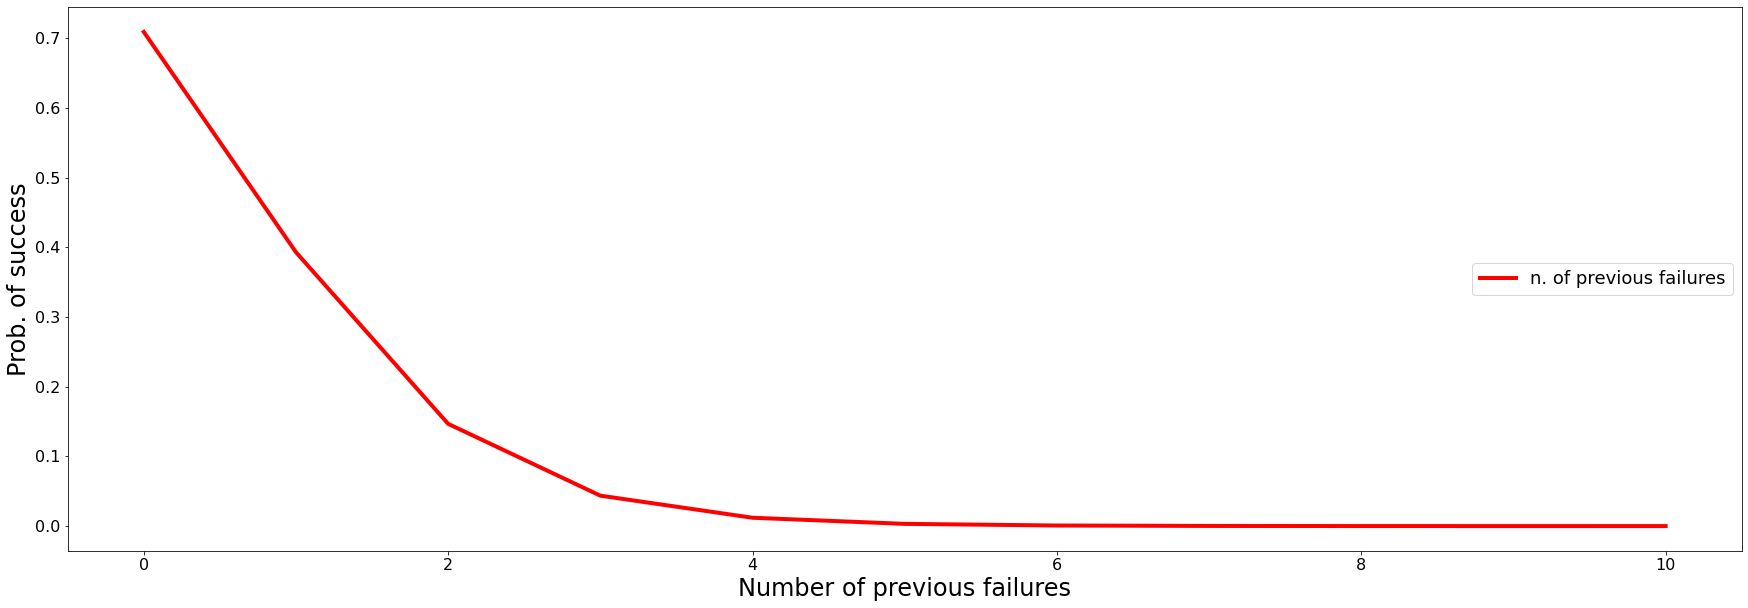

In [ ]:
# Predicted probability plot for previous_failures

_ = plt.figure(figsize=(30,10))
plt.plot(projects, probs_fail, linewidth=4, label='n. of previous failures',color="red")
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

plt.xlabel("Number of previous failures", fontsize=24) 
plt.ylabel("Prob. of success", fontsize=24, rotation=90)

plt.legend(loc = 'center right', prop={'size': 18})
plt.show()

Text(0.5, 0, 'Number of previous successes')

Text(0, 0.5, 'Prob. of success')

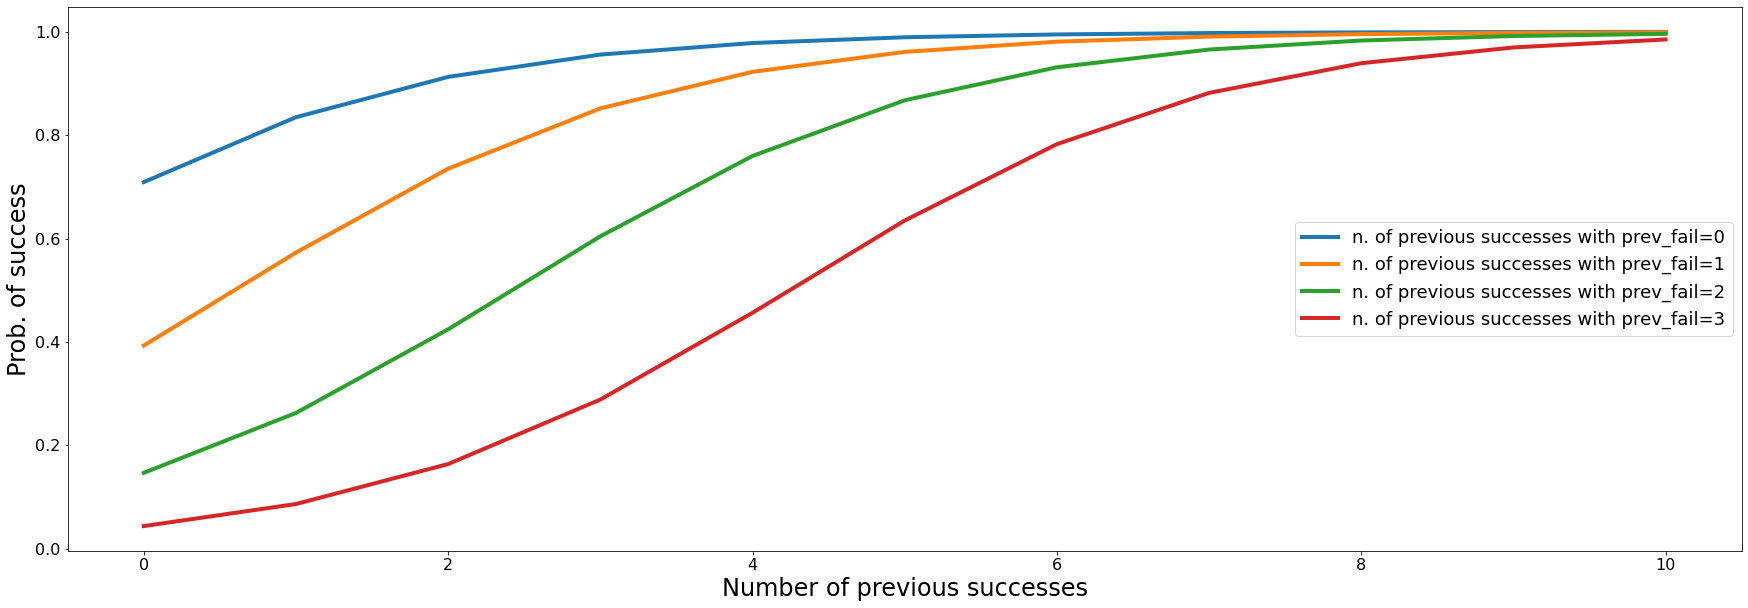

In [ ]:
# Plot predicted probability for different levels of previous_failures
probs_succ2 = []
for k in projects:
    df = data[indep_vars].copy()
    df.insert(loc=0, column='const', value=1)
    df = df.iloc[0].to_frame().reset_index()
    df.columns = ['vars', 'value']
    df['value'] = np.where(df['vars']!='const', 0, df['value'])
    df['value'] = np.where(df['vars']=='prev_success', k, df['value'])
    df['value'] = np.where(df['vars']=='prev_fail', 1, df['value'])
    for var,avg in avg_dict.items():
      df['value'] = np.where(df['vars'] == var, avg, df['value'])
    vals = df[['value']].values.flatten()
    # generate predicted probability
    prob = results.predict(vals)
    # add predicted prob to list
    probs_succ2.append(prob[0])

probs_succ3 = []
for k in projects:
    df = data[indep_vars].copy()
    df.insert(loc=0, column='const', value=1)
    df = df.iloc[0].to_frame().reset_index()
    df.columns = ['vars', 'value']
    df['value'] = np.where(df['vars']!='const', 0, df['value'])
    df['value'] = np.where(df['vars']=='prev_success', k, df['value'])
    df['value'] = np.where(df['vars']=='prev_fail', 2, df['value'])
    for var,avg in avg_dict.items():
      df['value'] = np.where(df['vars'] == var, avg, df['value'])
    vals = df[['value']].values.flatten()
    # generate predicted probability
    prob = results.predict(vals)
    # add predicted prob to list
    probs_succ3.append(prob[0])

probs_succ4 = []
for k in projects:
    df = data[indep_vars].copy()
    df.insert(loc=0, column='const', value=1)
    df = df.iloc[0].to_frame().reset_index()
    df.columns = ['vars', 'value']
    df['value'] = np.where(df['vars']!='const', 0, df['value'])
    df['value'] = np.where(df['vars']=='prev_success', k, df['value'])
    df['value'] = np.where(df['vars']=='prev_fail', 3, df['value'])
    for var,avg in avg_dict.items():
      df['value'] = np.where(df['vars'] == var, avg, df['value'])
    vals = df[['value']].values.flatten()
    # generate predicted probability
    prob = results.predict(vals)
    # add predicted prob to list
    probs_succ4.append(prob[0])

_ = plt.figure(figsize=(30,10))
plt.plot(projects, probs_succ, linewidth=4, label='n. of previous successes with prev_fail=0')
plt.plot(projects, probs_succ2, linewidth=4, label='n. of previous successes with prev_fail=1')
plt.plot(projects, probs_succ3, linewidth=4, label='n. of previous successes with prev_fail=2')
plt.plot(projects, probs_succ4, linewidth=4, label='n. of previous successes with prev_fail=3')
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

plt.xlabel("Number of previous successes", fontsize=24) 
plt.ylabel("Prob. of success", fontsize=24, rotation=90)

plt.legend(loc = 'center right', prop={'size': 18})
plt.show()

In [ ]:
data.to_json('/content/drive/My Drive/Kickstarter Project/processed_dataset_v3')

# Mean Comparison

In [ ]:
data = pd.read_json('/content/drive/My Drive/Kickstarter Project/processed_dataset_v3')
data.head()

,id,name,blurb,outcome,country,deadline_at,launched_at,staff_pick,backers_count,converted_pledged_amount,creator.id,location.displayable_name,location.country,location.state,category.name,goal_converted,parent_category_name,year,duration,weekday,weekend,event,prev_project,prev_success,prev_fail,n_projects,blurb_len,th_goal
1,1577455391,This is also not a Kickstarter shirt,A T-shirt with the final stats of the project ...,1,US,2014-05-28 22:17:37,2014-05-14 22:17:37,1,604,16167,8,"New York, NY",US,NY,Apparel,500.0,Fashion,2014,14,Wednesday,0,1,0,0,0,2,68,0.50
2,171893227,Invisible Courts,A series of alternate NBA realities inspired b...,1,US,2017-01-12 02:00:00,2017-01-04 18:28:57,1,104,207,8,"New York, NY",US,NY,Zines,50.0,Publishing,2017,7,Wednesday,0,2,1,1,0,2,83,0.05
10,389695249,The Red House Restaurant HomeMade Comfort Food,"My Ultimate Dream, Passion❤❤❤ The Red House Re...",0,US,2018-07-06 16:18:02,2018-06-06 16:18:02,0,3,12,250503,"Freeville, NY",US,NY,Restaurants,200000.0,Food,2018,30,Wednesday,0,3,2,0,2,3,123,200.00
11,458128423,The Red House HomeMade To Go,"My Ultimate Dream, Passion❤❤❤\r\nThe Red House...",0,US,2018-03-13 02:54:43,2018-02-11 03:54:43,0,1,5,250503,"Aurora, NY",US,NY,Restaurants,200000.0,Food,2018,29,Sunday,1,2,1,0,1,3,135,200.00
12,168050712,"The Red House by Nancy Jackson ""Pay it Forward...","The Red House has a unique ""Pay it Forward"" co...",0,US,2016-03-10 20:27:25,2016-02-09 20:27:25,0,3,3,250503,"Dryden, NY",US,NY,Restaurants,50000.0,Food,2016,30,Tuesday,0,1,0,0,0,3,135,50.00


In [ ]:
df = data.copy()

In [ ]:
# Create a dataframe, keeping the first and the second project of creators
remove = ['id', 'name', 'blurb', 'country', 'deadline_at', 'launched_at', 'backers_count', 'converted_pledged_amount', 'location.country', 'location.displayable_name', 'location.state', 'category.name',
 'parent_category_name', 'year', 'weekday', 'event', 'staff_pick']

df_keep_first_creators = df[df['prev_project']==0]
df_keep_first_creators = df_keep_first_creators.drop(labels = remove, axis = 1)

df_keep_last_creators = df[df['prev_project']==1]
df_keep_last_creators = df_keep_last_creators.drop(labels= remove, axis = 1)

In [ ]:
# Dataframe in which x vars are the first projects, and y vars are the second projects
merged = pd.merge(df_keep_first_creators, df_keep_last_creators, how= 'inner', on=['creator.id'])
merged

,outcome_x,creator.id,goal_converted_x,duration_x,weekend_x,prev_project_x,prev_success_x,prev_fail_x,n_projects_x,blurb_len_x,th_goal_x,outcome_y,goal_converted_y,duration_y,weekend_y,prev_project_y,prev_success_y,prev_fail_y,n_projects_y,blurb_len_y,th_goal_y
0,1,8,500.0,14,0,0,0,0,2,68,0.5,1,50.0,7,0,1,1,0,2,83,0.050
1,0,250503,50000.0,30,0,0,0,0,3,135,50.0,0,200000.0,29,1,1,0,1,3,135,200.000
2,1,506671,5000.0,30,0,0,0,0,14,132,5.0,1,3000.0,59,0,1,1,0,14,110,3.000
3,1,767182,17000.0,33,0,0,0,0,2,134,17.0,1,20000.0,30,0,1,1,0,2,131,20.000
4,1,1602077,5000.0,36,1,0,0,0,2,133,5.0,1,20000.0,30,0,1,1,0,2,115,20.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8562,1,2146111355,7500.0,30,0,0,0,0,7,132,7.5,1,7911.0,32,0,1,1,0,7,124,7.911
8563,1,2146510891,300.0,30,0,0,0,0,3,132,0.3,1,4000.0,45,1,1,1,0,3,118,4.000
8564,0,2146682420,25000.0,28,0,0,0,0,2,134,25.0,0,25000.0,30,0,1,0,1,2,134,25.000
8565,1,2146814483,5000.0,30,0,0,0,0,3,118,5.0,1,3000.0,22,0,1,1,0,3,123,3.000


In [ ]:
# Success first, failure second
succ1_fail2 = merged[(merged['outcome_x'] == 1) & (merged['outcome_y'] == 0)]
n_s1f2 = len(succ1_fail2)

# Success first, success second
succ1_succ2 = merged[(merged['outcome_x'] == 1) & (merged['outcome_y'] == 1)]
n_s1s2 = len(succ1_succ2)

# Failure first, failure second
fail1_fail2 = merged[(merged['outcome_x'] == 0) & (merged['outcome_y'] == 0)]
n_f1f2 = len(fail1_fail2)

# Failure first, success second
fail1_succ2 = merged[(merged['outcome_x'] == 0) & (merged['outcome_y'] == 1)]
n_f1s2 = len(fail1_succ2)
fail1_fail2.head(3)

,outcome_x,creator.id,goal_converted_x,duration_x,weekend_x,prev_project_x,prev_success_x,prev_fail_x,n_projects_x,blurb_len_x,th_goal_x,outcome_y,goal_converted_y,duration_y,weekend_y,prev_project_y,prev_success_y,prev_fail_y,n_projects_y,blurb_len_y,th_goal_y
1,0,250503,50000.0,30,0,0,0,0,3,135,50.0,0,200000.0,29,1,1,0,1,3,135,200.0
8,0,2108107,11000.0,30,0,0,0,0,2,135,11.0,0,16000.0,60,1,1,0,1,2,95,16.0
12,0,3780562,5000.0,30,0,0,0,0,2,92,5.0,0,1500.0,14,0,1,0,1,2,128,1.5


In [ ]:
# We consider only the variables that are under entrepreneurs' control and were significant in the regression

remove = ['outcome_x', 'outcome_y', 'creator.id', 'prev_project_x', 'prev_project_y', 'prev_success_x',
                  'prev_success_y', 'prev_fail_x', 'prev_fail_y', 'n_projects_x', 'n_projects_y', 'weekend_x', 'weekend_y']

succ1_fail2_t = succ1_fail2.drop(labels = remove, axis = 1)

succ1_succ2_t = succ1_succ2.drop(labels = remove, axis = 1) 

fail1_fail2_t = fail1_fail2.drop(labels = remove, axis = 1)

fail1_succ2_t = fail1_succ2.drop(labels = remove, axis = 1) 

In [ ]:
# Create a function that takes a data and returns the list of t_statistics

def t_statistics (data):
  N = len(data)*2
  var_2_goal = np.var(data['goal_converted_y'])
  var_1_goal = np.var(data['goal_converted_x'])
  var_2_durat = np.var(data['duration_y'])
  var_1_durat = np.var(data['duration_x'])
  var_2_blurb = np.var(data['blurb_len_y'])
  var_1_blurb = np.var(data['blurb_len_x'])

  #std deviation
  s_goal = np.sqrt((var_1_goal + var_2_goal)/2)
  s_durat = np.sqrt((var_1_durat + var_2_durat)/2)
  s_blurb = np.sqrt((var_1_blurb + var_2_blurb)/2)

  # ## Calculate the t-statistics
  t_goal = (np.mean(data['goal_converted_x']) - np.mean(data['goal_converted_y']))/(np.sqrt((var_1_goal/(N/2))+(var_2_goal/(N/2))))
  t_durat = (np.mean(data['duration_x']) - np.mean(data['duration_y']))/(np.sqrt((var_1_durat/(N/2))+(var_2_durat/(N/2))))
  t_blurb = (np.mean(data['blurb_len_x']) - np.mean(data['blurb_len_y']))/(np.sqrt((var_1_blurb/(N/2))+(var_2_blurb/(N/2))))

  data_t = [t_goal, t_durat, t_blurb]
  return data_t

s1f2_t = t_statistics(succ1_fail2_t)
s1f2_t

[-3.4396125695589927, -0.6604385082522655, 2.0786936006891077]

In [ ]:
# s1f2

N = len(succ1_fail2_t)*2

var_2_goal = np.var(succ1_fail2_t['goal_converted_y'])
var_1_goal = np.var(succ1_fail2_t['goal_converted_x'])
var_2_durat = np.var(succ1_fail2_t['duration_y'])
var_1_durat = np.var(succ1_fail2_t['duration_x'])
var_2_blurb = np.var(succ1_fail2_t['blurb_len_y'])
var_1_blurb = np.var(succ1_fail2_t['blurb_len_x'])

# Std deviation
s_goal = np.sqrt((var_1_goal + var_2_goal)/2)
s_durat = np.sqrt((var_1_durat + var_2_durat)/2)
s_blurb = np.sqrt((var_1_blurb + var_2_blurb)/2)

# Calculate the t-statistics
t_goal = (np.mean(succ1_fail2_t['goal_converted_x']) - np.mean(succ1_fail2_t['goal_converted_y']))/(np.sqrt((var_1_goal/(N/2))+(var_2_goal/(N/2))))
t_durat = (np.mean(succ1_fail2_t['duration_x']) - np.mean(succ1_fail2_t['duration_y']))/(np.sqrt((var_1_durat/(N/2))+(var_2_durat/(N/2))))
t_blurb = (np.mean(succ1_fail2_t['blurb_len_x']) - np.mean(succ1_fail2_t['blurb_len_y']))/(np.sqrt((var_1_blurb/(N/2))+(var_2_blurb/(N/2))))

s1f2_t = [t_goal, t_durat, t_blurb]
s1f2_t

[-3.4396125695589927, -0.6604385082522655, 2.0786936006891077]

In [ ]:
# s1s2

N = len(succ1_succ2_t)*2

var_2_goal = np.var(succ1_succ2_t['goal_converted_y'])
var_1_goal = np.var(succ1_succ2_t['goal_converted_x'])
var_2_durat = np.var(succ1_succ2_t['duration_y'])
var_1_durat = np.var(succ1_succ2_t['duration_x'])
var_2_blurb = np.var(succ1_succ2_t['blurb_len_y'])
var_1_blurb = np.var(succ1_succ2_t['blurb_len_x'])

# Std deviation
s_goal = np.sqrt((var_1_goal + var_2_goal)/2)
s_durat = np.sqrt((var_1_durat + var_2_durat)/2)
s_blurb = np.sqrt((var_1_blurb + var_2_blurb)/2)

# Calculate the t-statistics
t_goal = (np.mean(succ1_succ2_t['goal_converted_x']) - np.mean(succ1_succ2_t['goal_converted_y']))/(np.sqrt((var_1_goal/(N/2))+(var_2_goal/(N/2))))
t_durat = (np.mean(succ1_succ2_t['duration_x']) - np.mean(succ1_succ2_t['duration_y']))/(np.sqrt((var_1_durat/(N/2))+(var_2_durat/(N/2))))
t_blurb = (np.mean(succ1_succ2_t['blurb_len_x']) - np.mean(succ1_succ2_t['blurb_len_y']))/(np.sqrt((var_1_blurb/(N/2))+(var_2_blurb/(N/2))))

s1s2_t = [t_goal, t_durat, t_blurb]
s1s2_t

[-1.901905381746692, 8.132003683313364, 7.921559996096579]

In [ ]:
# f1f2

N = len(fail1_fail2_t)*2

var_2_goal = np.var(fail1_fail2_t['goal_converted_y'])
var_1_goal = np.var(fail1_fail2_t['goal_converted_x'])
var_2_durat = np.var(fail1_fail2_t['duration_y'])
var_1_durat = np.var(fail1_fail2_t['duration_x'])
var_2_blurb = np.var(fail1_fail2_t['blurb_len_y'])
var_1_blurb = np.var(fail1_fail2_t['blurb_len_x'])

# Std deviation
s_goal = np.sqrt((var_1_goal + var_2_goal)/2)
s_durat = np.sqrt((var_1_durat + var_2_durat)/2)
s_blurb = np.sqrt((var_1_blurb + var_2_blurb)/2)

# Calculate the t-statistics
t_goal = (np.mean(fail1_fail2_t['goal_converted_x']) - np.mean(fail1_fail2_t['goal_converted_y']))/(np.sqrt((var_1_goal/(N/2))+(var_2_goal/(N/2))))
t_durat = (np.mean(fail1_fail2_t['duration_x']) - np.mean(fail1_fail2_t['duration_y']))/(np.sqrt((var_1_durat/(N/2))+(var_2_durat/(N/2))))
t_blurb = (np.mean(fail1_fail2_t['blurb_len_x']) - np.mean(fail1_fail2_t['blurb_len_y']))/(np.sqrt((var_1_blurb/(N/2))+(var_2_blurb/(N/2))))

f1f2_t = [t_goal, t_durat, t_blurb]
f1f2_t

[0.7880112378965116, -2.4541651997261194, 4.9955256920351285]

In [ ]:
# f1s2

N = len(fail1_succ2_t)*2

var_2_goal = np.var(fail1_succ2_t['goal_converted_y'])
var_1_goal = np.var(fail1_succ2_t['goal_converted_x'])
var_2_durat = np.var(fail1_succ2_t['duration_y'])
var_1_durat = np.var(fail1_succ2_t['duration_x'])
var_2_blurb = np.var(fail1_succ2_t['blurb_len_y'])
var_1_blurb = np.var(fail1_succ2_t['blurb_len_x'])

# Std deviation
s_goal = np.sqrt((var_1_goal + var_2_goal)/2)
s_durat = np.sqrt((var_1_durat + var_2_durat)/2)
s_blurb = np.sqrt((var_1_blurb + var_2_blurb)/2)

# Calculate the t-statistics
t_goal = (np.mean(fail1_succ2_t['goal_converted_x']) - np.mean(fail1_succ2_t['goal_converted_y']))/(np.sqrt((var_1_goal/(N/2))+(var_2_goal/(N/2))))
t_durat = (np.mean(fail1_succ2_t['duration_x']) - np.mean(fail1_succ2_t['duration_y']))/(np.sqrt((var_1_durat/(N/2))+(var_2_durat/(N/2))))
t_blurb = (np.mean(fail1_succ2_t['blurb_len_x']) - np.mean(fail1_succ2_t['blurb_len_y']))/(np.sqrt((var_1_blurb/(N/2))+(var_2_blurb/(N/2))))

f1s2_t = [t_goal, t_durat, t_blurb]
f1s2_t

[2.5627755405368635, 5.888790410571356, 2.297246797131782]

In [ ]:
ttest = pd.DataFrame({'s1f2': s1f2_t,
                      's1s2': s1s2_t,
                      'f1f2': f1f2_t,
                      'f1s2': f1s2_t})
ttest.index = ['goal', 'duration', 'blurb_len']
ttest

,s1f2,s1s2,f1f2,f1s2
goal,-3.439613,-1.901905,0.788011,2.562776
duration,-0.660439,8.132004,-2.454165,5.888790
blurb_len,2.078694,7.921560,4.995526,2.297247


In [ ]:
# Define a function that calculates the p-value for the former t-statistics and returns a list of p-values

def p_val_t (data):
  df = 2* len(data) - 3
  p_goal = stats.t.cdf(x = -np.abs(s1f2_t[0]),df=df)
  p_duration = stats.t.cdf(x = -np.abs(s1f2_t[1]),df=df)
  p_blurb = stats.t.cdf(x = -np.abs(s1f2_t[2]),df=df)
  p_val = [p_goal, p_duration, p_blurb]
  return p_val

p_val_s1f2 = p_val_t(succ1_fail2_t)
p_val_s1f2

[0.00030097114002511675, 0.25454771482276595, 0.018925612854956295]

In [ ]:
# pval s1f2

df_s1f2 = 2*len(succ1_fail2_t) - 3
df_s1s2 = 2*len(succ1_succ2_t) - 3
df_f1f2 = 2*len(fail1_fail2_t) - 3
df_f1s2 = 2*len(fail1_succ2_t) - 3

# p-value s1f2
p_s1f2_goal = stats.t.cdf(x = -np.abs(s1f2_t[0]),df=df_s1f2)
p_s1f2_duration = stats.t.cdf(x = -np.abs(s1f2_t[1]),df=df_s1f2)
p_s1f2_blurb = stats.t.cdf(x = -np.abs(s1f2_t[2]),df=df_s1f2)
p_val_s1f2 = [p_s1f2_goal, p_s1f2_duration, p_s1f2_blurb]
p_val_s1f2

[0.00030097114002511675, 0.25454771482276595, 0.018925612854956295]

In [ ]:
# p-value s1s2
p_s1s2_goal = stats.t.cdf(x = -np.abs(s1s2_t[0]),df=df_s1s2)
p_s1s2_duration = stats.t.cdf(x = -np.abs(s1s2_t[1]),df=df_s1s2)
p_s1s2_blurb = stats.t.cdf(x = -np.abs(s1s2_t[2]),df=df_s1s2)
p_val_s1s2 = [p_s1s2_goal, p_s1s2_duration, p_s1s2_blurb]

In [ ]:
# p-value f1f2
p_f1f2_goal = stats.t.cdf(x = -np.abs(f1f2_t[0]),df=df_f1f2)
p_f1f2_duration = stats.t.cdf(x = -np.abs(f1f2_t[1]),df=df_f1f2)
p_f1f2_blurb = stats.t.cdf(x = -np.abs(f1f2_t[2]),df=df_f1f2)
p_val_f1f2 = [p_f1f2_goal, p_f1f2_duration, p_f1f2_blurb]

In [ ]:
# p-value f1s2
p_f1s2_goal = 2*stats.t.cdf(x = -np.abs(f1s2_t[0]),df=df_f1s2)
p_f1s2_duration = 2*stats.t.cdf(x = -np.abs(f1s2_t[1]),df=df_f1s2)
p_f1s2_blurb = 2*stats.t.cdf(x = -np.abs(f1s2_t[2]),df=df_f1s2)
p_val_f1s2 = [p_f1s2_goal, p_f1s2_duration, p_f1s2_blurb]

In [ ]:
pvals = pd.DataFrame({'s1f2': p_val_s1f2,
                      's1s2': p_val_s1s2,
                      'f1f2': p_val_f1f2,
                      'f1s2': p_val_f1s2})
pvals.index = ['goal_pval', 'duration_pval', 'blurb_len_pval']
print(pvals)

                    s1f2          s1s2          f1f2          f1s2
goal_pval       0.000301  2.860498e-02  2.153720e-01  1.047709e-02
duration_pval   0.254548  2.340898e-16  7.085052e-03  4.755920e-09
blurb_len_pval  0.018926  1.287215e-15  3.078902e-07  2.173666e-02


In [ ]:
df_t = ttest.append(pvals)
df_t

,s1f2,s1s2,f1f2,f1s2
goal,-3.439613,-1.901905e+00,7.880112e-01,2.562776e+00
duration,-0.660439,8.132004e+00,-2.454165e+00,5.888790e+00
blurb_len,2.078694,7.921560e+00,4.995526e+00,2.297247e+00
goal_pval,0.000301,2.860498e-02,2.153720e-01,1.047709e-02
duration_pval,0.254548,2.340898e-16,7.085052e-03,4.755920e-09
blurb_len_pval,0.018926,1.287215e-15,3.078902e-07,2.173666e-02


# Creator-dyads Matching Analysis 

In [ ]:
data = pd.read_json('/content/drive/My Drive/Kickstarter Project/processed_dataset_v3')
data.head()

,id,name,blurb,outcome,country,deadline_at,launched_at,staff_pick,backers_count,converted_pledged_amount,creator.id,location.displayable_name,location.country,location.state,category.name,goal_converted,parent_category_name,year,duration,weekday,weekend,event,prev_project,prev_success,prev_fail,n_projects,blurb_len,th_goal
1,1577455391,This is also not a Kickstarter shirt,A T-shirt with the final stats of the project ...,1,US,2014-05-28 22:17:37,2014-05-14 22:17:37,1,604,16167,8,"New York, NY",US,NY,Apparel,500.0,Fashion,2014,14,Wednesday,0,1,0,0,0,2,68,0.50
2,171893227,Invisible Courts,A series of alternate NBA realities inspired b...,1,US,2017-01-12 02:00:00,2017-01-04 18:28:57,1,104,207,8,"New York, NY",US,NY,Zines,50.0,Publishing,2017,7,Wednesday,0,2,1,1,0,2,83,0.05
10,389695249,The Red House Restaurant HomeMade Comfort Food,"My Ultimate Dream, Passion❤❤❤ The Red House Re...",0,US,2018-07-06 16:18:02,2018-06-06 16:18:02,0,3,12,250503,"Freeville, NY",US,NY,Restaurants,200000.0,Food,2018,30,Wednesday,0,3,2,0,2,3,123,200.00
11,458128423,The Red House HomeMade To Go,"My Ultimate Dream, Passion❤❤❤\r\nThe Red House...",0,US,2018-03-13 02:54:43,2018-02-11 03:54:43,0,1,5,250503,"Aurora, NY",US,NY,Restaurants,200000.0,Food,2018,29,Sunday,1,2,1,0,1,3,135,200.00
12,168050712,"The Red House by Nancy Jackson ""Pay it Forward...","The Red House has a unique ""Pay it Forward"" co...",0,US,2016-03-10 20:27:25,2016-02-09 20:27:25,0,3,3,250503,"Dryden, NY",US,NY,Restaurants,50000.0,Food,2016,30,Tuesday,0,1,0,0,0,3,135,50.00


In [ ]:
data=data[((data['prev_project']==1) & (data['prev_fail']==1)) | (data['prev_project']==0)]
data=data[data.duplicated(subset=['creator.id', 'parent_category_name'],keep=False)]

In [ ]:
data.head(6)
data['id'].drop_duplicates(inplace=True)
len(data)

,id,name,blurb,outcome,country,deadline_at,launched_at,staff_pick,backers_count,converted_pledged_amount,creator.id,location.displayable_name,location.country,location.state,category.name,goal_converted,parent_category_name,year,duration,weekday,weekend,event,prev_project,prev_success,prev_fail,n_projects,blurb_len,th_goal
11,458128423,The Red House HomeMade To Go,"My Ultimate Dream, Passion❤❤❤\r\nThe Red House...",0,US,2018-03-13 02:54:43,2018-02-11 03:54:43,0,1,5,250503,"Aurora, NY",US,NY,Restaurants,200000.0,Food,2018,29,Sunday,1,2,1,0,1,3,135,200.0
12,168050712,"The Red House by Nancy Jackson ""Pay it Forward...","The Red House has a unique ""Pay it Forward"" co...",0,US,2016-03-10 20:27:25,2016-02-09 20:27:25,0,3,3,250503,"Dryden, NY",US,NY,Restaurants,50000.0,Food,2016,30,Tuesday,0,1,0,0,0,3,135,50.0
107,1329795333,"""Show you care, with what you wear""","Candy Colored Leather women's collection, with...",0,US,2017-11-09 01:48:41,2017-09-10 00:48:41,0,1,1,2108107,"East Providence, RI",US,RI,Ready-to-wear,16000.0,Fashion,2017,60,Sunday,1,2,1,0,1,2,95,16.0
108,422750088,"""Show YOU care, with what YOU wear""",Our mission @ N.Y.CHULA captivates the world w...,0,US,2017-09-03 01:59:05,2017-08-04 01:59:05,0,3,27,2108107,"East Providence, RI",US,RI,Ready-to-wear,11000.0,Fashion,2017,30,Friday,0,1,0,0,0,2,135,11.0
204,233099416,Help My Knitted Treasures become bigger.,Trying to grow my knitting and hand made items...,0,US,2015-04-29 17:38:23,2015-03-30 17:38:23,0,1,1,4075289,"Folsom, CA",US,CA,Knitting,1500.0,Crafts,2015,30,Monday,0,1,0,0,0,3,101,1.5
205,334455813,Help MyKnittedTreasures Fly,I create beautiful one-of-a-kind treasures for...,0,US,2015-09-15 06:59:00,2015-09-04 22:15:37,0,3,45,4075289,"Folsom, CA",US,CA,Knitting,1500.0,Crafts,2015,10,Friday,0,2,1,0,1,3,74,1.5


3846

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
name = data['name'].values.tolist()
vect = TfidfVectorizer(min_df=1)

tfidf = vect.fit_transform(name)
ciao = pd.DataFrame((tfidf * tfidf.T).A)

In [ ]:
i=0
j=1
similarity=[]
while j < len(ciao):
    mao = ciao.loc[i][[j]]
    zedong = ciao.loc[i][[j]]
    similarity.extend(mao)
    similarity.extend(zedong)
    i+=2
    j+=2
print(mao)
print(zedong)
i
j

3845    0.488479
Name: 3844, dtype: float64
3845    0.488479
Name: 3844, dtype: float64


3846

3847

In [ ]:
data['similarity']=similarity
data.head(8)
len(data)
prova = data[data['similarity']>=0.55]
len(prova)

prova['blurb'].dtype
prova['blurb_string'] =  prova['blurb'].astype('string')
prova['blurb_len'] = prova['blurb_string'].str.len()
prova.head()

,id,name,blurb,outcome,country,deadline_at,launched_at,staff_pick,backers_count,converted_pledged_amount,creator.id,location.displayable_name,location.country,location.state,category.name,goal_converted,parent_category_name,year,duration,weekday,weekend,event,prev_project,prev_success,prev_fail,n_projects,blurb_len,th_goal,similarity
11,458128423,The Red House HomeMade To Go,"My Ultimate Dream, Passion❤❤❤\r\nThe Red House...",0,US,2018-03-13 02:54:43,2018-02-11 03:54:43,0,1,5,250503,"Aurora, NY",US,NY,Restaurants,200000.0,Food,2018,29,Sunday,1,2,1,0,1,3,135,200.0,0.268945
12,168050712,"The Red House by Nancy Jackson ""Pay it Forward...","The Red House has a unique ""Pay it Forward"" co...",0,US,2016-03-10 20:27:25,2016-02-09 20:27:25,0,3,3,250503,"Dryden, NY",US,NY,Restaurants,50000.0,Food,2016,30,Tuesday,0,1,0,0,0,3,135,50.0,0.268945
107,1329795333,"""Show you care, with what you wear""","Candy Colored Leather women's collection, with...",0,US,2017-11-09 01:48:41,2017-09-10 00:48:41,0,1,1,2108107,"East Providence, RI",US,RI,Ready-to-wear,16000.0,Fashion,2017,60,Sunday,1,2,1,0,1,2,95,16.0,1.000000
108,422750088,"""Show YOU care, with what YOU wear""",Our mission @ N.Y.CHULA captivates the world w...,0,US,2017-09-03 01:59:05,2017-08-04 01:59:05,0,3,27,2108107,"East Providence, RI",US,RI,Ready-to-wear,11000.0,Fashion,2017,30,Friday,0,1,0,0,0,2,135,11.0,1.000000
204,233099416,Help My Knitted Treasures become bigger.,Trying to grow my knitting and hand made items...,0,US,2015-04-29 17:38:23,2015-03-30 17:38:23,0,1,1,4075289,"Folsom, CA",US,CA,Knitting,1500.0,Crafts,2015,30,Monday,0,1,0,0,0,3,101,1.5,0.113875
205,334455813,Help MyKnittedTreasures Fly,I create beautiful one-of-a-kind treasures for...,0,US,2015-09-15 06:59:00,2015-09-04 22:15:37,0,3,45,4075289,"Folsom, CA",US,CA,Knitting,1500.0,Crafts,2015,10,Friday,0,2,1,0,1,3,74,1.5,0.113875
242,952791601,Shades of Shame: What's $10 to create and buy ...,A once decorated Detective struggles to repair...,0,US,2016-12-10 06:03:10,2016-11-10 06:03:10,0,5,125,4775351,"New York, NY",US,NY,Thrillers,200000.0,Film & Video,2016,30,Thursday,0,1,0,0,0,2,134,200.0,0.350601
243,1330087002,"Shades Of Shame ""Dream to live forever, Live t...",A once decorated Detective struggles to repair...,0,US,2017-02-18 06:23:50,2017-01-19 06:23:50,0,16,2049,4775351,"New York, NY",US,NY,Thrillers,100000.0,Film & Video,2017,30,Thursday,0,2,1,0,1,2,127,100.0,0.350601


3846

1546

dtype('O')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,id,name,blurb,outcome,country,deadline_at,launched_at,staff_pick,backers_count,converted_pledged_amount,creator.id,location.displayable_name,location.country,location.state,category.name,goal_converted,parent_category_name,year,duration,weekday,weekend,event,prev_project,prev_success,prev_fail,n_projects,blurb_len,th_goal,similarity,blurb_string
107,1329795333,"""Show you care, with what you wear""","Candy Colored Leather women's collection, with...",0,US,2017-11-09 01:48:41,2017-09-10 00:48:41,0,1,1,2108107,"East Providence, RI",US,RI,Ready-to-wear,16000.0,Fashion,2017,60,Sunday,1,2,1,0,1,2,95,16.0,1.000000,"Candy Colored Leather women's collection, with..."
108,422750088,"""Show YOU care, with what YOU wear""",Our mission @ N.Y.CHULA captivates the world w...,0,US,2017-09-03 01:59:05,2017-08-04 01:59:05,0,3,27,2108107,"East Providence, RI",US,RI,Ready-to-wear,11000.0,Fashion,2017,30,Friday,0,1,0,0,0,2,135,11.0,1.000000,Our mission @ N.Y.CHULA captivates the world w...
306,853599868,Ga. Pacific by Michael Nove'lll,Music is an undying passion for me-I need your...,0,US,2016-11-07 09:44:00,2016-10-28 12:22:15,0,0,0,6372320,"Honolulu, HI",US,HI,World Music,3000.0,Music,2016,9,Friday,0,1,0,0,0,2,130,3.0,0.838067,Music is an undying passion for me-I need your...
307,1869831216,Ga. Pacific Album by Michael Nove'lll re-ignited,Music is an undying spark within-I need YOUR h...,0,US,2016-12-11 13:48:00,2016-11-08 15:40:52,0,0,0,6372320,"Honolulu, HI",US,HI,World Music,150000.0,Music,2016,32,Tuesday,0,2,1,0,1,2,129,150.0,0.838067,Music is an undying spark within-I need YOUR h...
361,680277811,d20 Dice Bag,Funding needed to start Business making dice b...,0,US,2015-02-27 05:24:39,2015-01-28 05:24:39,0,11,479,7436327,"Bremerton, WA",US,WA,Gaming Hardware,5000.0,Games,2015,30,Wednesday,0,1,0,0,0,2,61,5.0,0.850397,Funding needed to start Business making dice b...


In [ ]:
first_attempt = prova[prova['prev_project']==0]
second_attempt_success = prova[(prova['prev_project']==1) & (prova['outcome']==1)]
second_attempt_failure = prova[(prova['prev_project']==1) & (prova['outcome']==0)]

In [ ]:
failure=list(second_attempt_failure['creator.id'])
first_attempt_then_failure = first_attempt[first_attempt['creator.id'].isin(failure)]

In [ ]:
success=list(second_attempt_success['creator.id'])
first_attempt_then_success = first_attempt[first_attempt['creator.id'].isin(success)]

In [ ]:
failure_failure = pd.merge(second_attempt_failure, first_attempt_then_failure, how= 'left' , on=['creator.id'])
len(failure_failure)
failure_failure['duration_change']=(((failure_failure['duration_x'])/(failure_failure['duration_y']))-1)
failure_failure['goal_change']=(((failure_failure['goal_converted_x'])/(failure_failure['goal_converted_y']))-1)
failure_failure['blurb_len_change']=(((failure_failure['blurb_len_x'])/(failure_failure['blurb_len_y']))-1)

ftf_change_in_duration= sum(failure_failure['duration_change'])/len(failure_failure['duration_change'])
ftf_change_in_goal_converted=sum(failure_failure['goal_change'])/len(failure_failure['goal_change'])
ftf_change_in_blurb_len=sum(failure_failure['blurb_len_change'])/len(failure_failure['blurb_len_change'])

failure_success = pd.merge(second_attempt_success, first_attempt_then_success, how= 'left' , on=['creator.id'])

failure_success['duration_change']=((failure_success['duration_x'])/(failure_success['duration_y']))-1
failure_success['goal_change']=((failure_success['goal_converted_x'])/(failure_success['goal_converted_y']))-1
failure_success['blurb_len_change']=((failure_success['blurb_len_x'])/(failure_success['blurb_len_y']))-1
len(failure_success)
fts_change_in_duration= sum(failure_success['duration_change'])/len(failure_success['duration_change'])
fts_change_in_goal_converted=sum(failure_success['goal_change'])/len(failure_success['goal_change'])
fts_change_in_blurb_len=sum(failure_success['blurb_len_change'])/len(failure_success['blurb_len_change'])
failure_success[['goal_converted_x','goal_converted_y']].describe()
failure_failure[['goal_converted_x','goal_converted_y']].describe()

496

277

,goal_converted_x,goal_converted_y
count,277.000000,277.000000
mean,5810.469218,18629.204742
std,11716.660328,59536.059539
min,5.000000,120.000000
25%,800.000000,3000.000000
50%,2000.000000,7500.000000
75%,5600.000000,20000.000000
max,150000.000000,950000.000000


,goal_converted_x,goal_converted_y
count,4.960000e+02,4.960000e+02
mean,5.079146e+04,7.275394e+04
std,3.413491e+05,3.778178e+05
min,3.500000e+01,3.000000e+01
25%,2.000000e+03,3.000000e+03
50%,5.000000e+03,1.000000e+04
75%,2.000000e+04,2.718750e+04
max,5.000000e+06,5.000000e+06


In [ ]:
from scipy.stats import ttest_ind
ttest_duration=ttest_ind(failure_success['duration_change'],failure_failure['duration_change'],equal_var=False)
ttest_goal=ttest_ind( failure_success['goal_change'],failure_failure['goal_change'],equal_var=False)
ttest_blurb_len=ttest_ind( failure_success['blurb_len_change'],failure_failure['blurb_len_change'],equal_var=False)


test_statistic_duration=ttest_duration[0]
test_statistic_goal=ttest_goal[0]
test_statistic_blurb_len=ttest_blurb_len[0]

pvalue_duration=ttest_duration[1]
pvalue_goal=ttest_goal[1]
pvalue_blurb_len=ttest_blurb_len[1]

In [ ]:
pairs_dict = {'avg change pairs failure-to-failure': [ftf_change_in_duration, ftf_change_in_goal_converted, ftf_change_in_blurb_len],
                'avg change pairs failure-to-success': [fts_change_in_duration, fts_change_in_goal_converted, fts_change_in_blurb_len],
              'test-statistic': [test_statistic_duration, test_statistic_goal, test_statistic_blurb_len],
             'p-value': [pvalue_duration, pvalue_goal, pvalue_blurb_len]}

# we pass the dict to the DataFrame constructor
variation_in_pairs = pd.DataFrame(pairs_dict)
variation_in_pairs['significance']=np.where(variation_in_pairs['p-value']<0.01,'***',variation_in_pairs['p-value'])
variation_in_pairs['significance']=np.where(variation_in_pairs['p-value']>=0.10,' ',variation_in_pairs['significance'])
variation_in_pairs['significance']=np.where((variation_in_pairs['p-value']<0.10)&(variation_in_pairs['p-value']>0.05),'*',variation_in_pairs['significance'])
variation_in_pairs['significance']=np.where((variation_in_pairs['p-value']<0.05)&(variation_in_pairs['p-value']>0.01),'**',variation_in_pairs['significance'])

variation_in_pairs.index = ['Duration', 'Goal', 'Blurb Length']
variation_in_pairs=variation_in_pairs.style.format({
    'avg change pairs failure-to-failure': '{:,.2%}'.format,
    'avg change pairs failure-to-success': '{:,.2%}'.format,
    'p-value': '{:,.4f}'.format
})
variation_in_pairs

variation_in_pairs.to_excel("variation in pairs.xlsx",index= True)

,avg change pairs failure-to-failure,avg change pairs failure-to-success,test-statistic,p-value,significance
Duration,52.55%,1.91%,-2.653089,0.0082,***
Goal,41.43%,-54.17%,-3.867684,0.0001,***
Blurb Length,0.27%,2.72%,0.912879,0.3617,
